# Bitcoin Sentiment

### Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [13]:
sentiment = pd.read_csv("fear_greed_index.csv")
sentiment.sample(10)

,timestamp,value,classification,date
1694,1664083800,24,Extreme Fear,2022-09-25
1224,1623475800,28,Fear,2021-06-12
582,1568007000,41,Fear,2019-09-09
1079,1610947800,79,Extreme Greed,2021-01-18
2494,1733290200,78,Extreme Greed,2024-12-04
1895,1681450200,68,Greed,2023-04-14
739,1581571800,65,Greed,2020-02-13
1244,1625203800,21,Extreme Fear,2021-07-02
1882,1680327000,61,Greed,2023-04-01
1606,1656480600,13,Extreme Fear,2022-06-29


In [14]:
history = pd.read_csv("historical_data.csv")
history.sample(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
63339,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,21.519000,2.00,43.04,BUY,24-02-2025 13:35,9.001558e+04,Open Long,0.000000,0xe370d3d24ba9015e263e041e5cf6180202eb004d7fa7...,74400900681,False,0.004130,9.650000e+14,1.740000e+12
203556,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,ENA,1.210000,3996.00,4835.16,SELL,03-01-2025 23:02,-3.943010e+05,Open Short,0.000000,0xbbf9b310c23ef134beb1041a92234a02011900a695b2...,60475119314,False,0.483516,6.670000e+14,1.740000e+12
34248,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,GRIFFAIN,0.224110,620.00,138.95,SELL,31-01-2025 05:01,8.660500e+04,Close Long,4.036200,0x2662a5faf3b33f28258e041cd5c5ba01c300ce309e33...,67854991589,False,0.013338,5.910000e+14,1.740000e+12
163919,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,32.900000,254.80,8382.92,SELL,22-12-2024 06:09,1.940909e+04,Sell,394.731549,0x5cf27dfa9d4003ac51590419c663a801a100efb2d6e1...,57551192224,False,0.419146,2.790000e+14,1.730000e+12
180971,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,14.750000,404.21,5962.10,BUY,19-03-2025 15:44,8.529940e+03,Open Long,0.000000,0xe29a7c55d3feb7abc34b041fd9c257017b0048d62684...,80697091638,True,1.788629,2.350000e+13,1.740000e+12
178584,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,14.319000,2.55,36.51,SELL,11-03-2025 12:58,-9.079000e+01,Open Short,0.000000,0xdfe0315046ee0c4afa3d041f53c8510203de00c14b45...,78976765406,True,0.010954,1.020000e+15,1.740000e+12
87315,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,HYPE,25.874000,68.93,1783.49,SELL,18-12-2024 05:14,9.192900e+02,Close Long,6.410490,0x4b98535741ee1f2af66d04197deb3e01f200fcfbc900...,56125533120,False,0.089174,5.210000e+14,1.730000e+12
125121,0x47add9a56df66b524d5e2c1993a43cde53b6ed85,USUAL,0.650000,516.50,335.73,SELL,11-01-2025 19:48,-4.904000e+03,Open Short,0.000000,0x77cbdb5c84b0e4a223ea041b3593c1018000c89eacea...,62233312809,False,0.032229,5.070000e+14,1.740000e+12
35769,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,JELLY,0.006729,17128.00,115.25,BUY,19-02-2025 22:22,-6.068075e+06,Close Short,-4.264872,0x0d6e334ca6cd7fba2ec5041e11fd3502016800198df9...,73451366067,True,0.038725,1.460000e+14,1.740000e+12
171087,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,21.900000,2.00,43.80,SELL,24-02-2025 10:47,8.447880e+03,Close Long,-1.566400,0x7a4b173eeb6e819d2d2d041e5b0d5702041f008a3ce7...,74386370546,False,0.004380,4.960000e+14,1.740000e+12


In [15]:
print(sentiment.shape)
sentiment.info()
sentiment.describe()

(2644, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [16]:
print(history.shape)
history.info()
history.describe()


(211224, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [20]:
sentiment.columns
history.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [23]:
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

history['Timestamp IST'] = pd.to_datetime(history['Timestamp IST'], errors='coerce')

history['trade_date'] = history['Timestamp IST'].dt.floor('D')


In [27]:
df = pd.merge(
    history,
    sentiment,
    left_on='trade_date',
    right_on='date',
    how='inner'
)
print(df.shape)
df.head()

(35864, 21)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12


In [33]:
df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
trade_date          0
timestamp           0
value               0
classification      0
date                0
dtype: int64

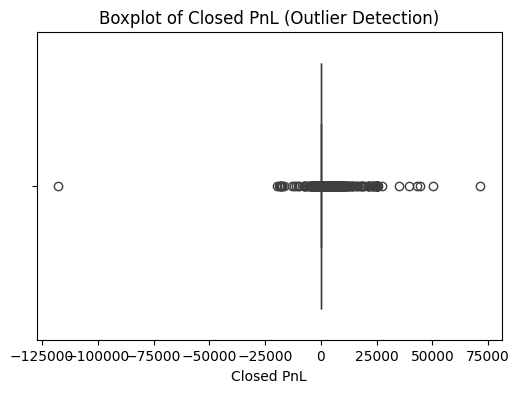

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Closed PnL'])
plt.title("Boxplot of Closed PnL (Outlier Detection)")
plt.show()

distribution contains significant outliers on both the profit and loss sides, which is expected in high-volatility crypto trading environments. These were retained to preserve the realism of risk exposure and trader behavior.

In [39]:
df['sentiment_num'] = df['classification'].map({'Fear': 0, 'Greed': 1})

corr = df[['Closed PnL', 'Size USD', 'Execution Price', 'Fee', 'sentiment_num']].corr()
print(corr)


                 Closed PnL  Size USD  Execution Price       Fee  \
Closed PnL         1.000000  0.046366        -0.015878  0.048484   
Size USD           0.046366  1.000000         0.117969  0.769286   
Execution Price   -0.015878  0.117969         1.000000  0.176018   
Fee                0.048484  0.769286         0.176018  1.000000   
sentiment_num     -0.026999 -0.013683         0.081866 -0.003441   

                 sentiment_num  
Closed PnL           -0.026999  
Size USD             -0.013683  
Execution Price       0.081866  
Fee                  -0.003441  
sentiment_num         1.000000  


In [40]:
daily = df.groupby(['trade_date', 'classification'])['Closed PnL'].sum().reset_index()

daily.groupby('classification')['Closed PnL'].mean()


classification
Extreme Fear       733.322758
Extreme Greed    26904.504083
Fear             48087.177910
Greed            10886.295226
Neutral           4666.046374
Name: Closed PnL, dtype: float64